In [2]:
import os
import numpy as np
import pandas as pd
import time, datetime

import matplotlib.pyplot as plt

%matplotlib inline


from sklearn.cluster import KMeans
# from sklearn.cluster import AffinityPropagation
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.cluster import MeanShift





In [4]:
curr_wd = os.getcwd()
data_dir = os.path.join(curr_wd, 'Data')
data_dir

'/Users/derekwang/Work/Forecasting/Final_Forecast_Process_0108/Data'

In [5]:
demand_raw_dir = os.path.join(data_dir, '3yearsSalesNew.txt')
demand_raw_df = pd.read_csv(demand_raw_dir, sep = '\t', header=0)
print (np.size(demand_raw_df, 0))
demand_raw_df.head()

12649939


,Subclass,SKU,Store,WEEK,Units
0,12,247,271,201450,2.0
1,12,237,351,201528,1.0
2,12,246,473,201625,1.0
3,12,263,261,201510,0.0
4,12,249,484,201620,0.0


In [6]:
add_raw_demand_dir1 = os.path.join(data_dir, 'Week1_4New.txt')
add_raw_demand_df1 = pd.read_csv(add_raw_demand_dir1, sep='\t', header=0)
print(np.size(add_raw_demand_df1, 0))
add_raw_demand_df1.head()

357548


,Subclass,SKU,Store,WEEK,Units
0,1,6,101,201701,11.0
1,1,6,101,201702,20.0
2,1,6,101,201703,14.0
3,1,6,101,201704,10.0
4,1,6,102,201701,20.0


In [7]:
add_raw_demand_dir2 = os.path.join(data_dir, 'Week5_8New.txt')
add_raw_demand_df2 = pd.read_csv(add_raw_demand_dir2, sep='\t', header=0)
add_raw_demand_df2=add_raw_demand_df2.rename(columns={'Week':'WEEK'})
print(np.size(add_raw_demand_df2, 0))
add_raw_demand_df2.head()

357548


,Subclass,SKU,Store,WEEK,Units
0,3,76,237,201705,72.0
1,11,71,486,201706,0.0
2,10,21,483,201707,17.0
3,8,66,124,201706,1.0
4,9,86,297,201705,4.0


In [8]:
add_raw_demand_dir3 = os.path.join(data_dir, 'Week9_12New.txt')
add_raw_demand_df3 = pd.read_csv(add_raw_demand_dir3, sep='\t', header=0)
add_raw_demand_df3=add_raw_demand_df3.rename(columns={'Week':'WEEK'})
print(np.size(add_raw_demand_df3, 0))
add_raw_demand_df3.head()

357548


,Subclass,SKU,Store,WEEK,Units
0,1,113,440,201709,1.000
1,4,92,223,201709,78.000
2,10,47,424,201709,0.000
3,9,99,272,201712,2.000
4,8,165,343,201712,1.229


In [9]:
add_raw_demand_dir4 = os.path.join(data_dir, 'Week13_16New.txt')
add_raw_demand_df4 = pd.read_csv(add_raw_demand_dir4, sep='\t', header=0)
add_raw_demand_df4=add_raw_demand_df4.rename(columns={'Week':'WEEK'})
print(np.size(add_raw_demand_df4, 0))
add_raw_demand_df4.head()

357548


,Subclass,SKU,Store,WEEK,Units
0,4,87,455,201716,66.0
1,9,131,413,201715,13.0
2,4,92,486,201716,31.0
3,10,21,134,201714,8.0
4,4,1,351,201716,16.0


In [10]:
add_raw_demand_dir5 = os.path.join(data_dir, 'Week17_20New.txt')
add_raw_demand_df5 = pd.read_csv(add_raw_demand_dir5, sep='\t', header=0)
add_raw_demand_df5=add_raw_demand_df5.rename(columns={'Week':'WEEK'})
add_raw_demand_df5 = pd.merge(add_raw_demand_df4.iloc[:,0:3].drop_duplicates(), add_raw_demand_df5, how='left', on =['Subclass', 'SKU', 'Store'])
print(np.size(add_raw_demand_df5, 0))
add_raw_demand_df5.head()

357548


,Subclass,SKU,Store,WEEK,Units
0,4,87,455,201719,41.0
1,4,87,455,201720,46.0
2,4,87,455,201717,84.0
3,4,87,455,201718,46.0
4,9,131,413,201718,10.0


In [11]:
add_pieces=[]
add_pieces.append(add_raw_demand_df1)
add_pieces.append(add_raw_demand_df2)
add_pieces.append(add_raw_demand_df3)
add_pieces.append(add_raw_demand_df4)
add_pieces.append(add_raw_demand_df5)

add_raw_demand_df=pd.concat(add_pieces)
print(np.size(add_raw_demand_df, 0))
add_raw_demand_df.head()

1787740


,Subclass,SKU,Store,WEEK,Units
0,1,6,101,201701,11.0
1,1,6,101,201702,20.0
2,1,6,101,201703,14.0
3,1,6,101,201704,10.0
4,1,6,102,201701,20.0


In [12]:
format_add = add_raw_demand_df.sort_values(['Subclass', 'SKU', 'Store', 'WEEK'])
LIST = format_add.loc[:, ['SKU', 'Store']].drop_duplicates().copy().reset_index(drop=True)

add_sales = format_add[(format_add.WEEK >= 201701)]['Units'].values.reshape(-1,add_raw_demand_df.WEEK.nunique())
add_sales_df = pd.DataFrame(add_sales, columns = [i for i in range(1, add_raw_demand_df.WEEK.nunique()+1)])

add_df = pd.concat([LIST, add_sales_df], axis = 1)
add_df.head()

,SKU,Store,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,6,101,11.0,20.0,14.0,10.0,21.0,17.0,8.0,14.0,...,8.0,17.0,1.0,20.0,11.0,29.0,13.0,27.0,8.0,10.0
1,6,102,20.0,2.0,9.0,4.0,4.0,10.0,26.0,14.0,...,2.0,15.0,21.0,3.0,6.0,10.0,28.0,12.0,11.0,23.0
2,6,103,10.0,5.0,17.0,15.0,6.0,7.0,3.0,22.0,...,6.0,5.0,44.0,19.0,15.0,3.0,16.0,19.0,33.0,15.0
3,6,104,15.0,12.0,12.0,3.0,14.0,19.0,5.0,19.0,...,23.0,39.0,28.0,40.0,7.0,31.0,15.0,19.0,9.0,20.0
4,6,105,31.0,71.0,16.0,19.0,5.0,20.0,10.0,19.0,...,24.0,12.0,15.0,22.0,22.0,24.0,12.0,28.0,24.0,13.0


In [29]:
format_df = demand_raw_df.sort_values(['Subclass', 'SKU', 'Store'])
format_df.to_csv(os.path.join(data_dir, 'Sorted_raw_demand.csv'))
STR_SKU_LIST = format_df.loc[:, ['Subclass','SKU', 'Store']].drop_duplicates().copy().reset_index(drop=True)

week_list_2014 = [i for i in range(201401, 201453)]
week_list_2015 = [i for i in range(201501, 201553)]
week_list_2016 = [i for i in range(201601, 201653)]

week_list_2014_df = pd.DataFrame(week_list_2014, columns=['WEEK'])
week_list_2015_df = pd.DataFrame(week_list_2015, columns=['WEEK'])
week_list_2016_df = pd.DataFrame(week_list_2016, columns=['WEEK'])

week_2014 = week_list_2014_df.copy().append([week_list_2014_df] * (np.size(STR_SKU_LIST, 0)-1))
week_2015 = week_list_2015_df.copy().append([week_list_2015_df] * (np.size(STR_SKU_LIST, 0)-1))
week_2016 = week_list_2016_df.copy().append([week_list_2016_df] * (np.size(STR_SKU_LIST, 0)-1))

l = STR_SKU_LIST.copy().append([STR_SKU_LIST] * (np.size(week_list_2014_df, 0)-1)).sort_values(['Subclass','SKU', 'Store']).reset_index(drop=True)

header_values_2014 = np.concatenate((l.values, week_2014.values), axis = 1)
header_values_2015 = np.concatenate((l.values, week_2015.values), axis = 1)
header_values_2016 = np.concatenate((l.values, week_2016.values), axis = 1)

headers_df_2014 = pd.DataFrame(header_values_2014, columns = ['Subclass', 'SKU', 'Store', 'WEEK'])
headers_df_2015 = pd.DataFrame(header_values_2015, columns = ['Subclass', 'SKU', 'Store', 'WEEK'])
headers_df_2016 = pd.DataFrame(header_values_2016, columns = ['Subclass', 'SKU', 'Store', 'WEEK'])


In [30]:
headers_df_2014.head()

,Subclass,SKU,Store,WEEK
0,1,6,101,201401
1,1,6,101,201402
2,1,6,101,201403
3,1,6,101,201404
4,1,6,101,201405


In [31]:
demand_raw_2014 = demand_raw_df[(demand_raw_df.WEEK >=201401) & (demand_raw_df.WEEK <201501)]
demand_raw_2015 = demand_raw_df[(demand_raw_df.WEEK >=201501) & (demand_raw_df.WEEK <201601)]
demand_raw_2016 = demand_raw_df[(demand_raw_df.WEEK >=201601) & (demand_raw_df.WEEK <201701)]


demand_with_Nan_2014 = pd.merge(headers_df_2014, demand_raw_2014, how='left', on=['Subclass', 'SKU', 'Store', 'WEEK'])
demand_with_Nan_2015 = pd.merge(headers_df_2015, demand_raw_2015, how='left', on=['Subclass', 'SKU', 'Store', 'WEEK'])
demand_with_Nan_2016 = pd.merge(headers_df_2016, demand_raw_2016, how='left', on=['Subclass', 'SKU', 'Store', 'WEEK'])
# demand_with_Nan.head()

In [32]:
demand_with_Nan_2016.head()

,Subclass,SKU,Store,WEEK,Units
0,1,6,101,201601,6.0
1,1,6,101,201602,5.0
2,1,6,101,201603,7.0
3,1,6,101,201604,19.0
4,1,6,101,201605,10.0


In [33]:
D_values_2014 = demand_with_Nan_2014['Units'].values.reshape(-1, 1)
D_values_2015 = demand_with_Nan_2015['Units'].values.reshape(-1, 1)
D_values_2016 = demand_with_Nan_2016['Units'].values.reshape(-1, 1)

two_years_mean = np.nanmean((D_values_2014, D_values_2015), axis = 0).reshape(-1, 52)
three_years_mean = np.nanmean((D_values_2014, D_values_2015, D_values_2016), axis = 0).reshape(-1, 52)

df_2Years = pd.DataFrame(two_years_mean, columns = [i for i in range(1,53)])
df_3Years = pd.DataFrame(three_years_mean, columns = [i for i in range(1,53)])

df_Year1 = pd.DataFrame(D_values_2014.reshape(-1, 52), columns = [i for i in range(1,53)])
df_Year2 = pd.DataFrame(D_values_2015.reshape(-1, 52), columns = [i for i in range(1,53)])
df_Year3 = pd.DataFrame(D_values_2016.reshape(-1, 52), columns = [i for i in range(1,53)])

two_years_mean_df = pd.concat([STR_SKU_LIST, df_2Years], axis = 1).drop(['Subclass'], axis = 1)
three_years_mean_df = pd.concat([STR_SKU_LIST, df_3Years], axis = 1).drop(['Subclass'], axis = 1)

year1_df = pd.concat([STR_SKU_LIST, df_Year1], axis = 1).drop(['Subclass'], axis = 1)
year2_df = pd.concat([STR_SKU_LIST, df_Year2], axis = 1).drop(['Subclass'], axis = 1)
year3_df = pd.concat([STR_SKU_LIST, df_Year3], axis = 1).drop(['Subclass'], axis = 1)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


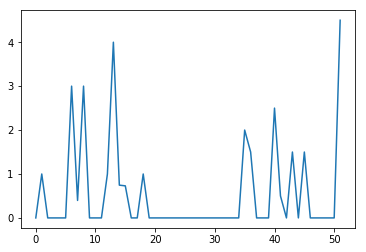

In [34]:
a = three_years_mean_df[(three_years_mean_df.SKU == 191) & (three_years_mean_df.Store == 206)].iloc[:,2:].values
plt.plot(a[0])
plt.show()

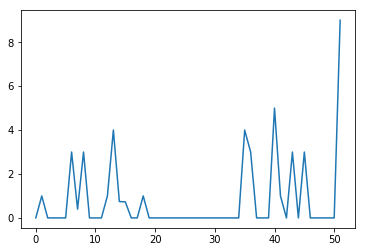

In [35]:
a = year3_df[(year3_df.SKU == 191) & (year3_df.Store == 206)].iloc[:,2:].values
plt.plot(a[0])
plt.show()

In [36]:
#Functions:

def calc_ncq(df):
    ncq_df = df.iloc[:,2:54].cumsum(axis = 1)
    ncq_max = ncq_df.iloc[:,-1]
    ncq_out =  ncq_df.values /  ncq_max.values[:,None]
    out_df = df.copy()
    out_df.iloc[:,2:54] = ncq_out
    
    return out_df

def scal_qty(df):
    scal_df = df.iloc[:,2:54].copy()
    scal_mean = scal_df.mean(axis = 1)
    scal_out =  scal_df.values /  scal_mean.values[:,None]
    out_df = df.copy()
    out_df.iloc[:,2:54] = scal_out
    
    return out_df

def get_km_result_df(data_ncq, data_scal, kmeans):
    title_df = data_ncq.loc[:,['SKU', 'Store']]
    title_df['Class_label'] = kmeans.labels_
    scal_df = title_df.merge(data_scal, how = 'left', on =['SKU', 'Store'])
    centers_df = scal_df.iloc[:,2:].groupby('Class_label').mean().copy()
    centers_df.reset_index(inplace=True)
    kmean_result_df = title_df.merge(centers_df, how = 'left', on =['Class_label'])
    
    return kmean_result_df

def scal_error_est(km_result, year3_df):
    year3_scal = scal_qty(year3_df)
    compare = km_result.merge(year3_scal, how = 'left', on =['SKU', 'Store'])
    error_matrix = compare.iloc[:,3:55].values - compare.iloc[:,55:107].values
    
    squared_error = np.sum(np.square(error_matrix))
    return squared_error

def ncq_error_est(km_result, year3_df):
    year3_clean = year3_df.dropna(axis = 0, how = 'any')
    year3_clean = year3_clean[(year3_clean.iloc[:,2:54].sum(axis =1) > 0)]
    year3_ncq = calc_ncq(year3_clean)
    km = calc_ncq(km_result.drop(['Class_label'], axis = 1))
    compare = km.merge(year3_ncq, how = 'inner', on =['SKU', 'Store'])
    error_matrix = compare.iloc[:,2:54].values - compare.iloc[:,54:106].values
    
    squared_error = np.sum(np.square(error_matrix))
    return squared_error

def get_Kmeans_fcst(base_df, factors_df):
    merge = pd.merge(base_df, factors_df.drop(['Class_label'], axis=1), how='inner', on=['SKU', 'Store'])
    matrix_base = merge.iloc[:,2:54].values
    matrix_factors = merge.iloc[:,54:106].values
    matrix_fcst = matrix_base*matrix_factors
    fcst_df = pd.DataFrame(matrix_fcst, columns=['Wk%d' % i for i in range(1,53)])
    result = pd.concat([merge.loc[:,['SKU','Store']], fcst_df], axis =1)
    return result

Count of Store_SKU in ewma: 75108
Count of Store_SKU in slow_mover: 23100
Count of Store_SKU to be processed: 52008
2018-01-17 11:47:48.558287
2018-01-17 11:48:04.024609
Error for 20 is: 18478.1406092
2018-01-17 11:48:04.024716
2018-01-17 11:48:23.083999
Error for 21 is: 18492.1303559
2018-01-17 11:48:23.084592
2018-01-17 11:48:45.448854
Error for 22 is: 18431.0386787
2018-01-17 11:48:45.448964
2018-01-17 11:49:08.721767
Error for 23 is: 18415.4107112
2018-01-17 11:49:08.721902
2018-01-17 11:49:29.757465
Error for 24 is: 18384.6732626
2018-01-17 11:49:29.757574
2018-01-17 11:49:55.162876
Error for 25 is: 18363.2710526
2018-01-17 11:49:55.163015
2018-01-17 11:50:15.217440
Error for 26 is: 18299.3470272
2018-01-17 11:50:15.217550
2018-01-17 11:50:42.499460
Error for 27 is: 18278.4372025
2018-01-17 11:50:42.499570
2018-01-17 11:51:08.352587
Error for 28 is: 18291.5624534
2018-01-17 11:51:08.352696
2018-01-17 11:51:40.112146
Error for 29 is: 18291.7028766
2018-01-17 11:51:40.112261
2018-01

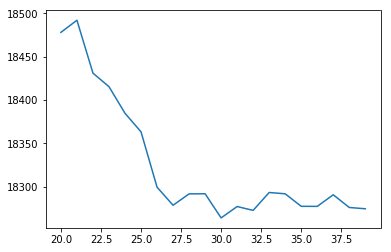

In [14]:
#Try to find the best K

#drop rows with any 'null' value 
#drop rows with sum of all sales equal to zero
data_clean = two_years_mean_df.dropna(axis = 0, how = 'any')
data_clean = data_clean[(data_clean.iloc[:,2:54].sum(axis =1) > 0)]

#smooth raw demand using exponential weighted moving average
data_ewma = data_clean.copy()
data_ewma.iloc[:,2:54] = data_clean.iloc[:,2:54].ewm(span = 4, axis = 1).mean()
print('Count of Store_SKU in ewma: %d' % np.size(data_ewma, 0))

#set threshhold for sales volume, item will be grouped together when annully sales <= 52
data_slow_mover = data_ewma[(data_ewma.iloc[:,2:54].sum(axis =1) <= 52)]
data_slow_mover = data_slow_mover.iloc[:, 0:54]
print ('Count of Store_SKU in slow_mover: %d' % np.size(data_slow_mover, 0))

#set threshhold for sales volume, item can be processed when annully sales > 52
data_vol = data_ewma[(data_ewma.iloc[:,2:54].sum(axis =1) > 52)]
print ('Count of Store_SKU to be processed: %d' % np.size(data_vol, 0))


data_ncq = calc_ncq(data_vol)
data_scal = scal_qty(data_vol)


#Finding best K for target dataset
test_list =[i for i in range(20, 40) ]
squared_error = []
for i in test_list:
    print (str(datetime.datetime.now()))
    X_train = data_ncq.iloc[:,2:54].values
    kmeans = KMeans(n_clusters = i, random_state=0).fit(X_train)
    error = ncq_error_est(get_km_result_df(data_ncq, data_scal, kmeans), year3_df)
    squared_error.append(error)
    print (str(datetime.datetime.now()))
    print ("Error for %d is: %s" % (i, error))

print(squared_error)


plt.plot(test_list, squared_error)
plt.show()


In [28]:
final_k = test_list[squared_error.index(min(squared_error))]
final_k =30

In [37]:
#final run with best k


#drop rows with any 'null' value 
#drop rows with sum of all sales equal to zero
data_clean = three_years_mean_df.dropna(axis = 0, how = 'any')
data_clean = data_clean[(data_clean.iloc[:,2:54].sum(axis =1) > 0)]

#smooth raw demand using exponential weighted moving average
data_ewma = data_clean.copy()
data_ewma.iloc[:,2:54] = data_clean.iloc[:,2:54].ewm(span = 4, axis = 1).mean()
print('Count of Store_SKU in ewma: %d' % np.size(data_ewma, 0))

#set threshhold for sales volume, item will be grouped together when annully sales <= 52
data_slow_mover = data_ewma[(data_ewma.iloc[:,2:54].sum(axis =1) <= 52)]
data_slow_mover = data_slow_mover.iloc[:, 0:54]
print ('Count of Store_SKU in slow_mover: %d' % np.size(data_slow_mover, 0))

#set threshhold for sales volume, item can be processed when annully sales > 52
data_vol = data_ewma[(data_ewma.iloc[:,2:54].sum(axis =1) > 52)]
print ('Count of Store_SKU to be processed: %d' % np.size(data_vol, 0))


data_ncq = calc_ncq(data_vol)
data_scal = scal_qty(data_vol)


print (str(datetime.datetime.now()))
X_train = data_ncq.iloc[:,2:54].values
kmeans = KMeans(n_clusters = final_k, random_state=0).fit(X_train)

pieces = []

#get the result from Kmeans
kmeans_result = get_km_result_df(data_ncq, data_scal, kmeans)
pieces.append(kmeans_result)


#get labels for slow movers
scal_slow_mover = scal_qty(data_slow_mover)
scal_slow_mover['Class_label'] = np.array([9999]*np.size(scal_slow_mover, 0))
slow_mover_centers = scal_slow_mover.iloc[:,2:].groupby('Class_label').mean()
slow_mover_centers.reset_index(inplace=True)
slow_mover_result = scal_slow_mover.loc[:,['SKU', 'Store', 'Class_label']].merge(slow_mover_centers, how='left', on=['Class_label'])

pieces.append(slow_mover_result)

df_result = pd.concat(pieces)
df_result['SKU'] = df_result['SKU'].astype('object')
df_result['Store'] = df_result['Store'].astype('object')

print (str(datetime.datetime.now()))

df_result.head()



Count of Store_SKU in ewma: 87161
Count of Store_SKU in slow_mover: 32596
Count of Store_SKU to be processed: 54565
2018-02-05 09:28:06.477819
2018-02-05 09:28:32.329551


,SKU,Store,Class_label,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
0,6,101,10,0.799264,0.817028,0.856657,0.885559,0.947358,1.005871,1.070763,...,0.749903,0.744947,0.727121,0.691882,0.634831,0.624605,0.620783,0.636247,0.656791,0.690319
1,6,102,0,0.873729,0.869588,0.898164,0.923993,0.945611,0.960064,0.970239,...,0.935151,0.951354,0.947344,0.928604,0.844982,0.854704,0.873811,0.890390,0.906829,0.925147
2,6,103,9,0.424626,0.442938,0.490592,0.536237,0.584384,0.650649,0.692235,...,0.827522,0.807352,0.776935,0.732731,0.649548,0.627865,0.609925,0.612708,0.613187,0.616289
3,6,104,25,0.666554,0.681822,0.734124,0.767015,0.824275,0.876862,0.928394,...,0.791977,0.777796,0.762698,0.722975,0.644892,0.629989,0.623279,0.636312,0.660713,0.694529
4,6,105,25,0.666554,0.681822,0.734124,0.767015,0.824275,0.876862,0.928394,...,0.791977,0.777796,0.762698,0.722975,0.644892,0.629989,0.623279,0.636312,0.660713,0.694529


In [38]:
#export seasonal factors at str_sku level
df_export = df_result.copy()
# df_export.to_csv(os.path.join(data_dir, 'Output\\Seasonalities_0116.csv'))
df_export.head(1).values

array([[6, 101, 10, 0.7992637187600528, 0.8170277012493508,
        0.8566568767803496, 0.8855592689020223, 0.9473581092474556,
        1.0058714503526105, 1.0707632323302751, 1.102414900661676,
        1.1576311870013731, 1.2083281057344075, 1.238882657539983,
        1.2884507649169958, 1.3320130195086946, 1.3814081620065948,
        1.3666764037275196, 1.3817241498111974, 1.4934656063702183,
        1.5822306775612591, 1.5466506864835434, 1.4490658895369832,
        1.3334563172251028, 1.2717690846258156, 1.1878342710599057,
        1.124432386526563, 1.0762988745190236, 1.0463231323549047,
        1.01306850410695, 0.9828310719536589, 0.9579551982414697,
        0.9486406983167874, 0.9464688600514014, 0.9304073220534241,
        0.9081420529815792, 0.8935685123885243, 0.8789200225531656,
        0.8685075037959323, 0.859174764623841, 0.8529698429011154,
        0.8406090070651733, 0.8172809745885441, 0.7908300724902911,
        0.7816407330165105, 0.7499028596676531, 0.744946594931

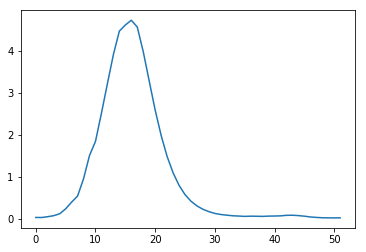

In [20]:
a = df_export[(df_export.SKU == 175) & (df_export.Store == 355)].iloc[:,3:].values
plt.plot(a[0])
plt.show()

In [50]:
df_export[(df_export.SKU == 1) & (df_export.Store == 101)].values


array([[1, 101, 4, 1.4343700168034437, 1.3934009899937327,
        1.3811815169925836, 1.3627953020393657, 1.370649287101585,
        1.338177288473983, 1.2945917823125677, 1.254821887254285,
        1.2210216779126069, 1.1833546490049482, 1.1564439553130201,
        1.1361000755141435, 1.107606906059372, 1.0894610347604898,
        1.0750693056661835, 1.0865636389016582, 1.111551129766804,
        1.135007231218791, 1.107347005411565, 1.0562697624778183,
        0.9896440025296035, 0.9982885472749558, 0.9507504182163898,
        0.9052290959795659, 0.8800728059937138, 0.850771615590415,
        0.8431158303756664, 0.826062679155799, 0.8187059262420802,
        0.8295465380878375, 0.8324023751299873, 0.8229537688007936,
        0.8193635537872507, 0.8047422731420509, 0.8083557312568396,
        0.8140878819041025, 0.8161835344383036, 0.8252434009430022,
        0.8361988503716179, 0.8371017171545369, 0.8397427062917427,
        0.8683792792732339, 0.8569702016497935, 0.8830468409640954

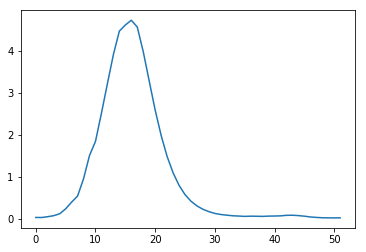

In [22]:
b = df_export[(df_export.Class_label == 2) ].iloc[:,3:].values
plt.plot(b[0])
plt.show()

In [23]:
df_export[(df_export.Class_label == 5)].head(10)

,SKU,Store,Class_label,1,2,3,4,5,6,7,...,43,44,45,46,47,48,49,50,51,52
26602,178,296,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27000,137,287,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27002,137,292,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27011,137,302,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27070,137,411,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27080,137,425,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27503,145,517,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
27753,66,334,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
28301,2,266,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891
28302,2,267,5,0.012653,0.011951,0.013525,0.019337,0.024257,0.053429,0.072052,...,0.080065,0.073915,0.058949,0.044481,0.034067,0.030605,0.022487,0.021337,0.022038,0.020891


In [39]:
#Get ARIMA output

ARIMA_dir = os.path.join(data_dir, 'arima_wk21_52output.csv')
ARIMA_df_raw = pd.read_csv(ARIMA_dir, sep = ',', header = 0, index_col=0).sort_values(by=['SKU', 'STORE', 'WEEKNO'])
ARIMA_df_raw.reset_index(drop=True)
STR_SKU_LIST = ARIMA_df_raw.loc[:, ['SKU', 'STORE']].drop_duplicates().copy().reset_index(drop=True)

ARIMA_output = ARIMA_df_raw['ARIMA'].values.reshape(-1,32)
ARIMA_h = pd.DataFrame(ARIMA_output, columns = [i for i in range(21,53)])
ARIMA_df = pd.concat([STR_SKU_LIST, ARIMA_h], axis=1)
ARIMA_df = ARIMA_df.rename(columns = {'STORE': 'Store'})
ARIMA_df.head()


/usr/local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,SKU,Store,21,22,23,24,25,26,27,28,...,43,44,45,46,47,48,49,50,51,52
0,1,101,6.504909,6.615829,6.630750,6.632757,6.633027,6.633064,6.633068,6.633069,...,6.633069,6.633069,6.633069,6.633069,6.633069,6.633069,6.633069,6.633069,6.633069,6.633069
1,1,102,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,...,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922,5.389922
2,1,103,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,...,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603,8.052603
3,1,104,13.892591,13.958145,14.022415,14.085426,14.147202,14.207768,14.267147,14.325364,...,15.073495,15.115914,15.157501,15.198274,15.238249,15.277440,15.315863,15.353534,15.390466,15.426675
4,1,105,5.533116,5.597101,5.658826,5.718370,5.775809,5.831220,5.884672,5.936236,...,6.523304,6.552303,6.580277,6.607263,6.633296,6.658409,6.682634,6.706004,6.728547,6.750294


In [40]:
ARIMA_df.describe()

,SKU,Store,21,22,23,24,25,26,27,28,...,43,44,45,46,47,48,49,50,51,52
count,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,...,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000
mean,137.426360,309.476004,7.235095,7.211833,7.191722,7.175396,7.163726,7.152769,7.144525,7.136381,...,7.076632,7.074178,7.072082,7.069834,7.067925,7.065906,7.064169,7.062306,7.060689,7.058986
std,79.052794,120.504229,20.424261,20.461949,20.426872,20.407769,20.393467,20.382026,20.371918,20.361829,...,20.269869,20.264994,20.261366,20.256844,20.253493,20.249283,20.246180,20.242266,20.239396,20.235748
min,1.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,205.000000,0.626990,0.622529,0.619246,0.613757,0.608079,0.603981,0.599459,0.595427,...,0.562707,0.561690,0.560283,0.559505,0.557873,0.556816,0.555645,0.554760,0.554037,0.553499
50%,137.000000,310.000000,1.776368,1.763082,1.758446,1.750062,1.743576,1.735980,1.733462,1.729063,...,1.697886,1.697286,1.695351,1.694532,1.693326,1.692983,1.691402,1.690847,1.690249,1.689615
75%,209.000000,413.000000,5.506826,5.474907,5.459913,5.455344,5.448299,5.442671,5.434892,5.423735,...,5.386388,5.382729,5.382922,5.380523,5.380049,5.378048,5.376233,5.375965,5.374364,5.374306
max,264.000000,518.000000,805.106697,807.669293,809.868528,811.755925,813.375701,814.765803,815.958797,816.982632,...,822.554159,822.642813,822.718896,822.784191,822.840227,822.888318,822.929590,822.965010,822.995407,823.021495


In [41]:
ARIMA_df[(ARIMA_df.SKU == 1) & (ARIMA_df.Store == 101)].values

array([[   1.        ,  101.        ,    6.50490901,    6.61582877,
           6.63075002,    6.63275727,    6.63302729,    6.63306361,
           6.6330685 ,    6.63306915,    6.63306924,    6.63306925,
           6.63306926,    6.63306926,    6.63306926,    6.63306926,
           6.63306926,    6.63306926,    6.63306926,    6.63306926,
           6.63306926,    6.63306926,    6.63306926,    6.63306926,
           6.63306926,    6.63306926,    6.63306926,    6.63306926,
           6.63306926,    6.63306926,    6.63306926,    6.63306926,
           6.63306926,    6.63306926]])

In [42]:
#Need to change index according to targeted forecast time period 

def get_Kmeans_fcst(base_df, factors_df):
    merge = pd.merge(base_df, factors_df.drop(['Class_label'], axis=1), how='inner', on=['SKU', 'Store'])
    matrix_base = merge.iloc[:,2:34].values
    matrix_factors = merge.iloc[:,54:86].values
    matrix_fcst = matrix_base*matrix_factors
    fcst_df = pd.DataFrame(matrix_fcst, columns=['Wk%d' % i for i in range(21,53)])
    result = pd.concat([merge.loc[:,['SKU','Store']], fcst_df], axis =1)
    return result



kmean_fcst = get_Kmeans_fcst(ARIMA_df, df_result)
kmean_fcst.head()

,SKU,Store,Wk21,Wk22,Wk23,Wk24,Wk25,Wk26,Wk27,Wk28,...,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52
0,1,101,6.437544,6.604506,6.304188,6.004165,5.837547,5.643222,5.592445,5.479331,...,5.684343,5.857311,5.894090,5.775567,5.635205,5.766310,5.884985,5.965561,6.074416,6.412110
1,1,102,5.204485,5.216752,5.193395,5.185315,5.213679,5.283380,5.283291,5.327833,...,5.804715,5.938301,5.946478,5.896487,5.456197,5.572949,5.630191,5.647041,5.663953,5.661031
2,1,103,7.775558,7.793885,7.758990,7.746918,7.789294,7.893428,7.893296,7.959842,...,8.672309,8.871888,8.884104,8.809418,8.151619,8.326047,8.411568,8.436742,8.462008,8.457643
3,1,104,14.959152,14.878983,14.628307,14.505997,14.429425,14.448732,14.276668,14.198284,...,13.311767,13.548603,13.514612,13.286840,12.315811,12.482070,12.693293,13.044461,13.396144,13.800554
4,1,105,7.213248,6.752619,6.265390,5.874936,5.607440,5.392762,5.255234,5.068308,...,4.170235,4.175987,4.110741,3.968677,3.651034,3.669498,3.703032,3.934984,4.245231,4.682907


In [43]:
#revise negative demand to zero
num = kmean_fcst._get_numeric_data()
num[(num < 0)] = 0
kmean_fcst = kmean_fcst.round(2)
# kmean_fcst.to_csv(os.path.join(data_dir, 'Output/THD_SC_FCasofWeek21.csv'))
kmean_fcst.head()

,SKU,Store,Wk21,Wk22,Wk23,Wk24,Wk25,Wk26,Wk27,Wk28,...,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52
0,1,101,6.44,6.60,6.30,6.00,5.84,5.64,5.59,5.48,...,5.68,5.86,5.89,5.78,5.64,5.77,5.88,5.97,6.07,6.41
1,1,102,5.20,5.22,5.19,5.19,5.21,5.28,5.28,5.33,...,5.80,5.94,5.95,5.90,5.46,5.57,5.63,5.65,5.66,5.66
2,1,103,7.78,7.79,7.76,7.75,7.79,7.89,7.89,7.96,...,8.67,8.87,8.88,8.81,8.15,8.33,8.41,8.44,8.46,8.46
3,1,104,14.96,14.88,14.63,14.51,14.43,14.45,14.28,14.20,...,13.31,13.55,13.51,13.29,12.32,12.48,12.69,13.04,13.40,13.80
4,1,105,7.21,6.75,6.27,5.87,5.61,5.39,5.26,5.07,...,4.17,4.18,4.11,3.97,3.65,3.67,3.70,3.93,4.25,4.68


In [44]:
#combine fcst with 2017 given sales for whole year data

kmean_fcst_head = kmean_fcst.iloc[:,0:2]
given_sales = pd.merge(kmean_fcst_head, add_df.iloc[:,0:22], how = 'left', on=['SKU', 'Store'])
combined_fcst = pd.merge(given_sales, kmean_fcst, how = 'left', on = ['SKU', 'Store'])
combined_fcst.head()

,SKU,Store,1,2,3,4,5,6,7,8,...,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52
0,1,101,4.0,1.0,2.0,9.0,0.0,3.0,1.0,7.0,...,5.68,5.86,5.89,5.78,5.64,5.77,5.88,5.97,6.07,6.41
1,1,102,7.0,2.0,1.0,0.0,5.0,41.0,1.0,0.0,...,5.80,5.94,5.95,5.90,5.46,5.57,5.63,5.65,5.66,5.66
2,1,103,2.0,8.0,3.0,2.0,1.0,0.0,6.0,11.0,...,8.67,8.87,8.88,8.81,8.15,8.33,8.41,8.44,8.46,8.46
3,1,104,23.0,10.0,22.0,11.0,3.0,10.0,15.0,6.0,...,13.31,13.55,13.51,13.29,12.32,12.48,12.69,13.04,13.40,13.80
4,1,105,7.0,5.0,3.0,0.0,2.0,0.0,9.0,4.0,...,4.17,4.18,4.11,3.97,3.65,3.67,3.70,3.93,4.25,4.68


In [45]:
combined_fcst[(combined_fcst.SKU == 1) & (combined_fcst.Store == 101)].values

array([[1, 101, 4.0, 1.0, 2.0, 9.0, 0.0, 3.0, 1.0, 7.0, 4.0, 36.0, 1.0,
        4.0, 2.0, 2.0, 0.0, 0.0, 14.0, 12.0, 2.0, 6.0, 6.44, 6.6, 6.3, 6.0,
        5.84, 5.64, 5.59, 5.48, 5.43, 5.5, 5.52, 5.46, 5.43, 5.34, 5.36,
        5.4, 5.41, 5.47, 5.55, 5.55, 5.57, 5.76, 5.68, 5.86, 5.89, 5.78,
        5.64, 5.77, 5.88, 5.97, 6.07, 6.41]], dtype=object)

In [46]:
def plot_sls(df, *num_plot):
    if not num_plot:
        for i in range(np.size(df, 0)):
            plt.plot(df.iloc[i, 2:].values)
    else:
        rand_int = np.random.randint(0, np.size(df, 0), num_plot[0])
        plot_df = df.iloc[rand_int, :]
        plot_data = plot_df.iloc[:, 2:]
        item_loc = plot_df.iloc[:,0:2]

        for i in range(num_plot[0]):
            plt.plot(plot_data.iloc[i].values)
    
    ticks = np.arange(0, 52, 5)
    labels = np.arange(1, 53, 5)
    plt.xticks(ticks, labels)
    print (item_loc)
    plt.show()
    
    
    
def plot_sales_fcst(SKU, Store):
    sales_2014 = year1_df[(year1_df.SKU == SKU) & (year1_df.Store == Store)].iloc[:,2:]
    sales_2015 = year2_df[(year2_df.SKU == SKU) & (year2_df.Store == Store)].iloc[:,2:]
    sales_2016 = year3_df[(year3_df.SKU == SKU) & (year3_df.Store == Store)].iloc[:,2:]
    fcst = combined_fcst[(kmean_fcst.SKU == SKU) & (kmean_fcst.Store == Store)].iloc[:,2:]
    
    plt.figure(figsize=(12, 9))
    sales2014, = plt.plot(sales_2014.iloc[0].values, label = 'sales2014')
    sales2015, = plt.plot(sales_2015.iloc[0].values, label = 'sales2015')
    sales2016, = plt.plot(sales_2016.iloc[0].values, label = 'sales2016')
    fcst, = plt.plot(fcst.iloc[0].values, label = 'fcst')
    ticks = np.arange(0, 52, 5)
    labels = np.arange(1, 53, 5)
    plt.xticks(ticks, labels)
    plt.legend(handles=[sales2014, sales2015, sales2016, fcst])
    
    plt.show()

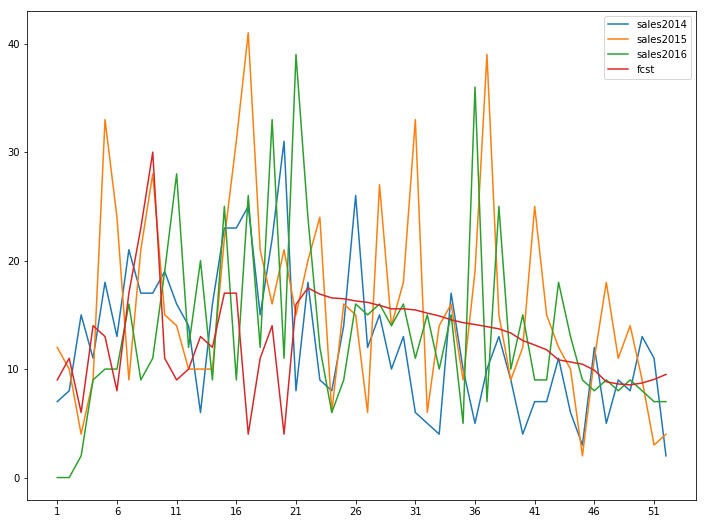

In [51]:
#plot sales hist and fcst for a SKU, Store
plot_sales_fcst(102, 481)

#Good pairs:
#(37, 190), (106, 349), (52, 321), (102, 481)
#Bad paris:
#(191, 206), (175, 355), (175, 194), (130, 440), (213, 406)


       SKU Store
4477    13   400
74687  234   483


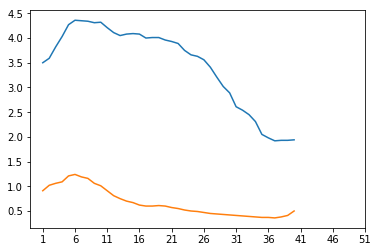

In [41]:
plot_sls(kmean_fcst,2)

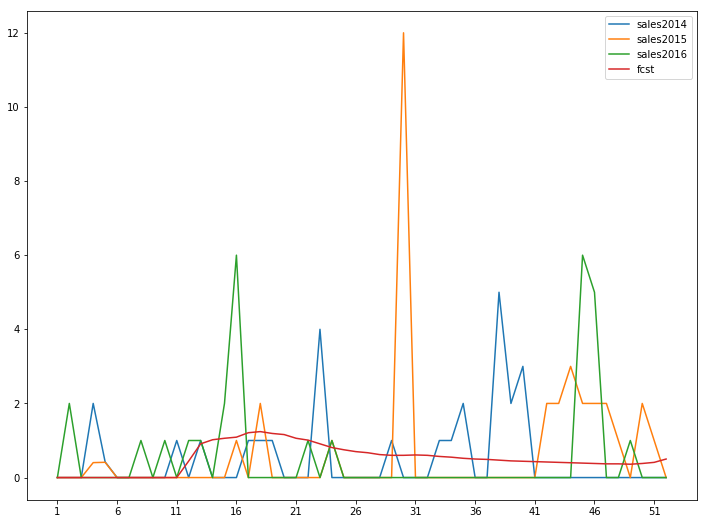

In [43]:
#plot sales hist and fcst for a SKU, Store
plot_sales_fcst(234, 483)

In [19]:
km_wk17_52_dir = os.path.join(data_dir, 'Output/THD_SC_FCasofWeek17.csv')
km_wk17_52_df = pd.read_csv(km_wk17_52_dir, sep=',', header=0, index_col=0)
km_wk17_52_df = km_wk17_52_df.round(2)
num = km_wk17_52_df._get_numeric_data()
num[(num <0)] = 0
km_wk17_52_df.head()

,SKU,Store,Wk17,Wk18,Wk19,Wk20,Wk21,Wk22,Wk23,Wk24,...,Wk43,Wk44,Wk45,Wk46,Wk47,Wk48,Wk49,Wk50,Wk51,Wk52
0,1,101,6.32,7.35,7.29,6.97,6.54,6.59,6.28,5.98,...,5.66,5.83,5.87,5.75,5.61,5.74,5.86,5.94,6.05,6.38
1,1,102,5.27,5.36,5.37,5.28,5.24,5.25,5.23,5.22,...,5.84,5.98,5.99,5.94,5.49,5.61,5.67,5.69,5.70,5.70
2,1,103,7.89,8.02,8.04,7.90,7.84,7.86,7.83,7.81,...,8.75,8.95,8.96,8.88,8.22,8.40,8.48,8.51,8.53,8.53
3,1,104,15.53,16.00,15.84,15.43,15.07,14.99,14.74,14.61,...,13.39,13.63,13.60,13.37,12.39,12.56,12.77,13.12,13.47,13.88
4,1,105,9.08,9.49,9.14,8.55,7.93,7.40,6.84,6.40,...,4.39,4.39,4.32,4.17,3.83,3.84,3.88,4.11,4.43,4.89


In [21]:
km_wk17_52_df[(km_wk17_52_df.SKU == 50) & (km_wk17_52_df.Store == 368)].values

array([[  50.  ,  368.  ,   36.78,   55.88,   41.93,   44.91,   39.76,
          39.37,   35.57,   32.38,   28.75,   24.51,   20.93,   17.39,
          14.18,   11.71,    9.59,    7.68,    6.14,    4.93,    3.77,
           3.06,    2.64,    2.17,    1.86,    1.54,    1.38,    1.21,
           1.12,    1.11,    1.02,    0.82,    0.65,    0.54,    0.45,
           0.44,    0.48,    0.54]])

In [23]:
def error_4weeks(km_fcst, act_demand):
    km_target = km_fcst.iloc[:,0:6].round(2)
    merge = pd.merge(km_target, act_demand, how = 'inner', on = (['SKU', 'Store']))
    km_matrix = merge.iloc[:,2:6].values
    act_matrix = merge.iloc[:, 22:26].values
    
    bias_error_matrix = km_matrix - act_matrix
    abs_error_matrix = abs(bias_error_matrix)
    
    bias_error_num = np.sum(bias_error_matrix, axis = 1)
    abs_error_num = np.sum(abs_error_matrix, axis = 1)
    
    fcst_don = np.sum(km_matrix, axis = 1)
    
    bias_pct_error = np.divide(bias_error_num,fcst_don, out=np.zeros_like(bias_error_num), where=fcst_don != 0)
    abs_pct_error = np.divide(abs_error_num, fcst_don, out=np.zeros_like(abs_error_num), where=fcst_don != 0)
    
    merge['bias_pct_error'] = bias_pct_error
    merge['abs_pct_error'] = abs_pct_error
    merge['weight'] = np.mean(merge.iloc[:,6:22], axis =1)
    
    print('Bias pct error: %s' % bias_pct_error)
    print('Abs pct error: %s' % abs_pct_error)
    
    return merge

error_df = error_4weeks(km_wk17_52_df, add_df)
error_df.head()

Bias pct error: [-0.21732904  0.29511278  0.37205651 ..., -0.03359173  0.49152542
  0.37106918]
Abs pct error: [ 0.66559255  0.45676692  0.37205651 ...,  0.50904393  0.49152542
  1.42767296]


,SKU,Store,Wk17,Wk18,Wk19,Wk20,1,2,3,4,...,14,15,16,17,18,19,20,bias_pct_error,abs_pct_error,weight
0,1,101,6.32,7.35,7.29,6.97,4.0,1.0,2.0,9.0,...,2.0,0.0,0.0,14.0,12.0,2.0,6.0,-0.217329,0.665593,4.7500
1,1,102,5.27,5.36,5.37,5.28,7.0,2.0,1.0,0.0,...,8.0,2.0,3.0,2.0,5.0,1.0,7.0,0.295113,0.456767,6.6875
2,1,103,7.89,8.02,8.04,7.90,2.0,8.0,3.0,2.0,...,2.0,8.0,8.0,3.0,6.0,6.0,5.0,0.372057,0.372057,6.0000
3,1,104,15.53,16.00,15.84,15.43,23.0,10.0,22.0,11.0,...,6.0,29.0,18.0,16.0,15.0,22.0,9.0,0.012739,0.223885,12.8125
4,1,105,9.08,9.49,9.14,8.55,7.0,5.0,3.0,0.0,...,21.0,7.0,8.0,4.0,4.0,6.0,8.0,0.393271,0.393271,4.9375


In [24]:
error_df.describe()

,SKU,Store,Wk17,Wk18,Wk19,Wk20,1,2,3,4,...,14,15,16,17,18,19,20,bias_pct_error,abs_pct_error,weight
count,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,...,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000,87161.000000
mean,137.426360,309.476004,9.465590,9.668970,9.487414,9.167790,6.353075,5.959507,6.249745,6.881595,...,9.047168,8.859217,9.177889,9.561594,9.836736,9.351671,8.697631,-0.237396,0.991320,7.797788
std,79.052794,120.504229,22.546936,23.125363,23.070715,22.576739,22.068275,20.173997,20.339572,21.617357,...,23.665742,22.561613,22.530123,23.174055,24.456878,23.581020,22.274557,2.635822,2.586388,20.880867
min,1.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-449.000000,0.000000,0.000000
25%,73.000000,205.000000,1.130000,1.150000,1.110000,1.080000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.426719,0.432099,0.687500
50%,137.000000,310.000000,2.880000,2.900000,2.800000,2.670000,0.113000,0.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.020808,0.695714,2.000000
75%,209.000000,413.000000,8.700000,8.890000,8.630000,8.250000,4.000000,4.000000,4.000000,5.000000,...,8.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0.396292,1.000000,6.332625
max,264.000000,518.000000,857.910000,880.050000,882.780000,873.100000,977.000000,863.000000,981.000000,628.000000,...,921.000000,825.000000,663.000000,973.000000,746.000000,818.000000,845.000000,1.000000,449.000000,829.062500


In [25]:
np.sum(error_df.bias_pct_error * error_df.weight) / np.sum(error_df.weight)

-0.036555717891486768

In [26]:
np.sum(error_df.abs_pct_error * error_df.weight) / np.sum(error_df.weight)

0.44006825248784626